# Linear Autoregressive Model

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

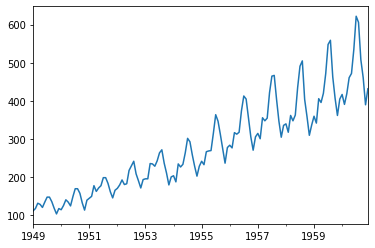

In [10]:
df = sns.load_dataset('flights')
ts = df['year'].astype(str) + ' ' + df['month'].astype(str)
df.set_index(pd.to_datetime(ts), inplace=True)
df['passengers'].plot()

### What is X and y?

*"predict the future from the past"*

* X - past numbers of passengers
* y - future number of passengers

$y_t = a_1 y_{t-1} + a_2 y_{t-2} + ... + b + \epsilon$

In [22]:
del df['x']
del df['ypred']

In [47]:
df['diff']  = df['passengers'].diff()

In [55]:
df['t-1'] = df['passengers'].shift(1)
df['t-2'] = df['passengers'].shift(2)
df['t-3'] = df['passengers'].shift(3)

In [56]:
df2 = df.dropna().copy()

In [57]:
df2.head(5)

,year,month,passengers,t-1,t-2,t-3,diff
1949-04-01,1949,April,129,132.0,118.0,112.0,-3.0
1949-05-01,1949,May,121,129.0,132.0,118.0,-8.0
1949-06-01,1949,June,135,121.0,129.0,132.0,14.0
1949-07-01,1949,July,148,135.0,121.0,129.0,13.0
1949-08-01,1949,August,148,148.0,135.0,121.0,0.0


In [58]:
X = df2[['t-1', 't-2', 't-3']]
y = df2['passengers']

In [59]:
m = LinearRegression()
m.fit(X, y)
m.score(X, y)   # R^2

0.9313942495239848

In [60]:
m.coef_, m.intercept_

(array([ 1.34822859, -0.59184156,  0.2018249 ]), 13.6409970931457)

In [61]:
df2['ypred'] = m.predict(X)

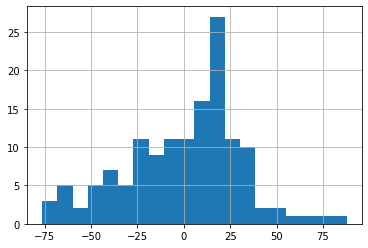

In [64]:
(df2['ypred'] - df2['passengers']).hist(bins=20)

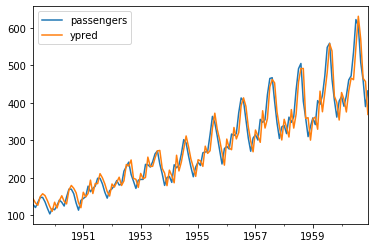

In [78]:
df2[['passengers', 'ypred']].plot()

### Forecast multiple steps: Prediction of a prediction of a prediction...

In [75]:
yp = list(df2['passengers'].values[:100])
for i in range(41):
    t1 = yp[-1]
    t2 = yp[-2]
    t3 = yp[-3]
    t0 = 1.34822859 * t1 -0.59184156 * t2 + 0.2018249 * t3 + 13.6409970931457
    yp.append(t0)

In [76]:
df2['multipred'] = yp

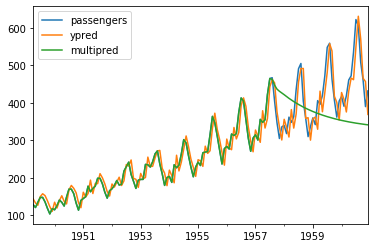

In [79]:
df2[['passengers', 'ypred',  'multipred']].plot()

## To apply this

* de-trend, de-season etc.
* use naive model or AR or LinReg or RandomForest model etc.
* make predictions
* add the seasons, add the trend (opposite order)

### For Long-term forecasts

* use vanilla LinReg (with `df['x'] = range(144)`)
* add polynomial / log / exp features
* resample / downsample to a different time delta